<a href="https://colab.research.google.com/github/ShireenKachroo/EDA-Mall-Customer-Segmentation/blob/main/Mall_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EDA for mall customer segmentation ---> Unsupervised ML(clustering)
group customers based on their spending habits and demographic info

Importing Libraries

In [1]:
import pandas as pd #data mainpulation
import numpy as np #numerical operations
import matplotlib.pyplot as plt #basic plotting
import seaborn as sns #enhanced visualizations


loading dataset

In [3]:
df = pd.read_csv('/Mall_Customers.csv')
print('Loaded data successfully')

Loaded data successfully


initial data inspection

In [4]:
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.shape

(200, 5)

In [8]:
print(df.columns)

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


In [9]:
print(df.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [10]:
print(df.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


Univariate Analysis - Analyzing individual features

A. Numerical Features

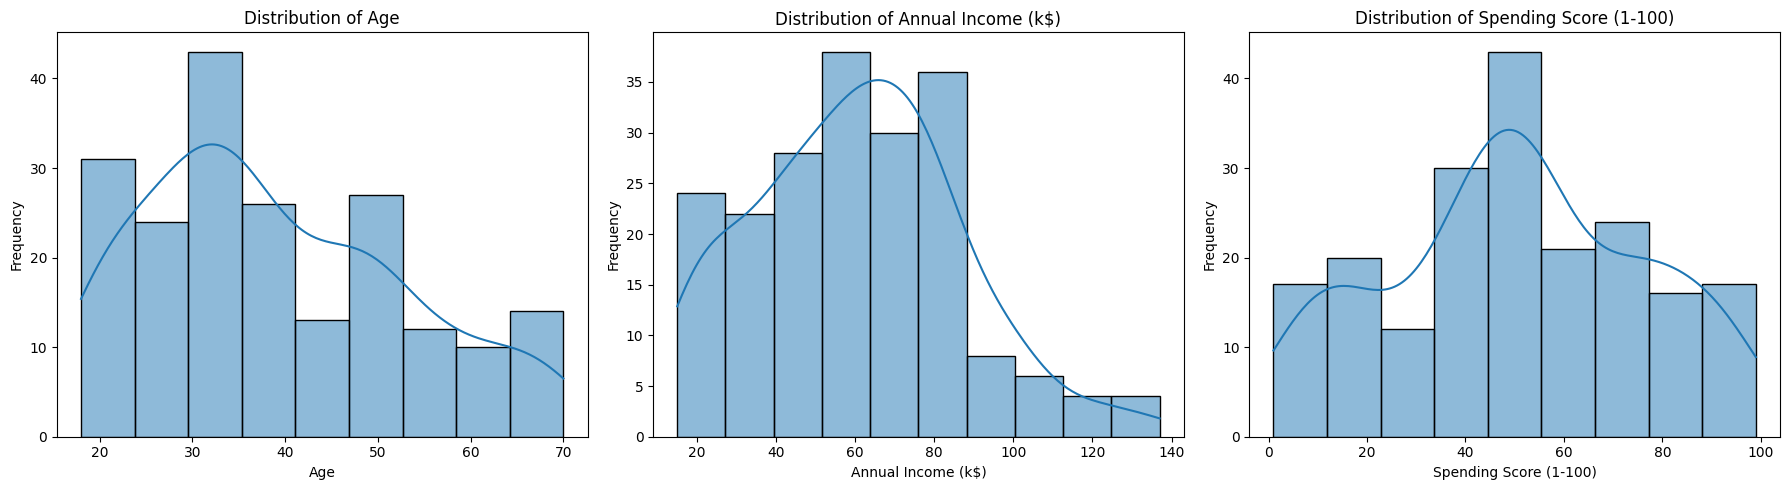

In [18]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.histplot(df['Age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1,3,2)
sns.histplot(df['Annual Income (k$)'],kde=True)
plt.title('Distribution of Annual Income (k$)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
sns.histplot(df['Spending Score (1-100)'], kde=True)
plt.title('Distribution of Spending Score (1-100)')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Frequency')

plt.tight_layout() # Adjust subplots to give a tight layout
plt.show()

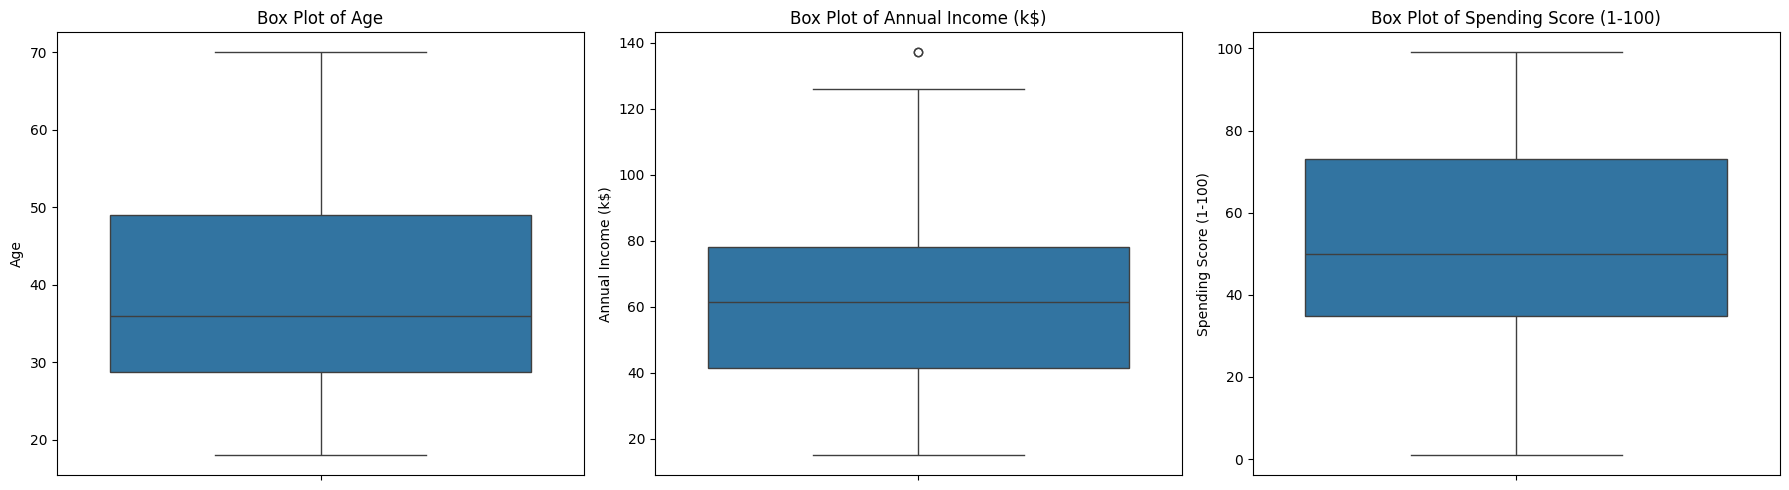

In [19]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.boxplot(y=df['Age'])
plt.title('Box Plot of Age')

plt.subplot(1, 3, 2)
sns.boxplot(y=df['Annual Income (k$)'])
plt.title('Box Plot of Annual Income (k$)')

plt.subplot(1, 3, 3)
sns.boxplot(y=df['Spending Score (1-100)'])
plt.title('Box Plot of Spending Score (1-100)')

plt.tight_layout()
plt.show()


B. Categorical Features

/tmp/ipython-input-21-4235409951.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='viridis')


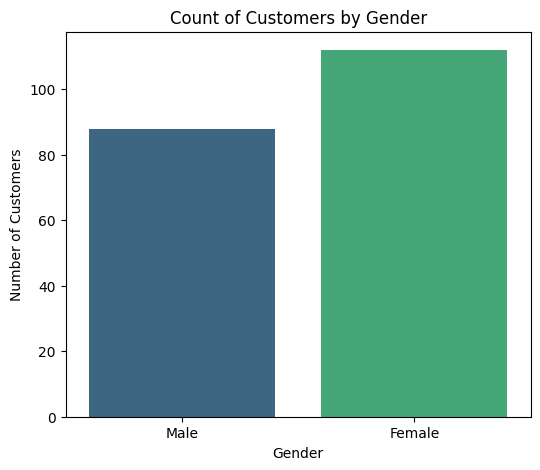


Value Counts for Gender
Gender
Female    112
Male       88
Name: count, dtype: int64
Percentage Male: 0.44%
Percentage Female: 0.56%


In [21]:
plt.figure(figsize=(6, 5))
sns.countplot(x='Gender', data=df, palette='viridis')
plt.title('Count of Customers by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.show()

print("\nValue Counts for Gender")
print(df['Gender'].value_counts())
print(f"Percentage Male: {df['Gender'].value_counts(normalize=True)['Male']:.2f}%")
print(f"Percentage Female: {df['Gender'].value_counts(normalize=True)['Female']:.2f}%")

Bivariate/Multivariate Analysis - Relationship b/w features

A. Numerical Vs Numerical

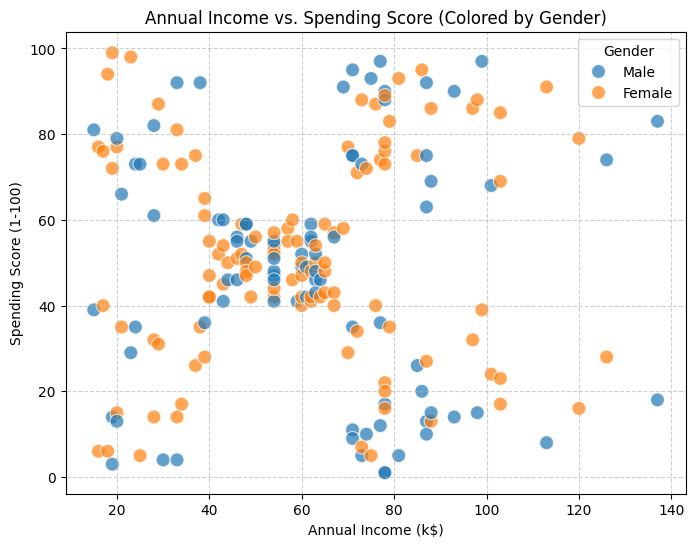

In [22]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, hue='Gender', s=100, alpha=0.7)
plt.title('Annual Income vs. Spending Score (Colored by Gender)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

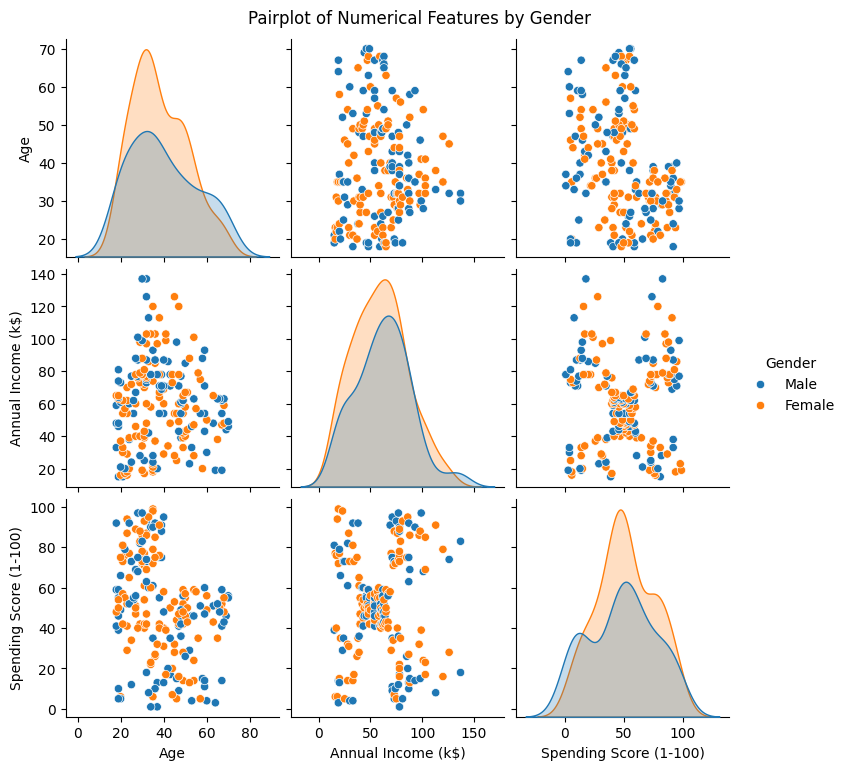

In [23]:
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender']], hue='Gender', diag_kind='kde')
plt.suptitle('Pairplot of Numerical Features by Gender', y=1.02)
plt.show()

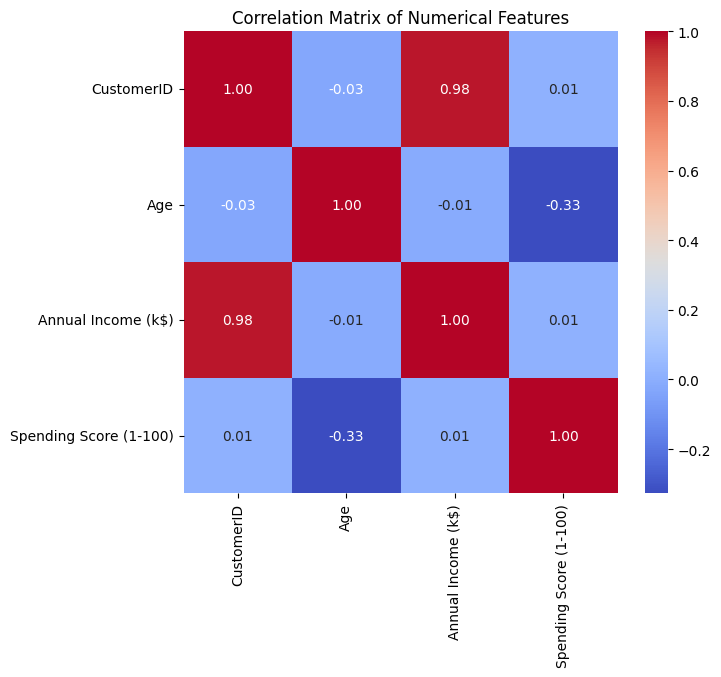

In [24]:
plt.figure(figsize=(7, 6))
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

B. Categorical Vs Numerical

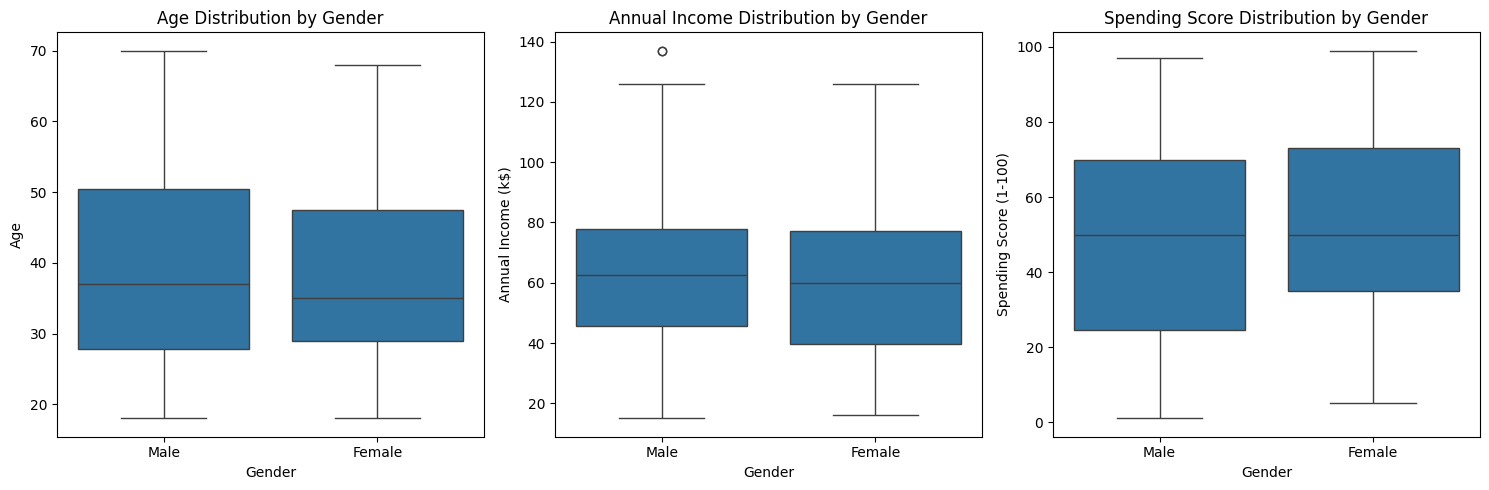

In [25]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='Gender', y='Age', data=df)
plt.title('Age Distribution by Gender')

plt.subplot(1, 3, 2)
sns.boxplot(x='Gender', y='Annual Income (k$)', data=df)
plt.title('Annual Income Distribution by Gender')

plt.subplot(1, 3, 3)
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=df)
plt.title('Spending Score Distribution by Gender')

plt.tight_layout()
plt.show()

**Mall Customer Segmentation: Exploratory Data Analysis Insights**

**Objective:**
The goal of this EDA was to understand the characteristics and spending patterns of mall customers to identify potential groups for targeted marketing strategies.

1. **Data Overview & Quality:**

The dataset contains 200 customer records with 5 features: CustomerID, Gender, Age, Annual Income (k$), and Spending Score (1-100).

Crucially, the data is clean, with no missing values or duplicate entries, which streamlines the analysis process.

2. **Univariate Analysis (Individual Feature Distributions):**

**Gender:** There's a slight imbalance, with approximately 56% female customers and 44% male customers.

**Age:** The customer base spans a wide age range (18-70), with a notable concentration in the 25-40 age bracket.

**Annual Income (k$):** The majority of customers have an annual income between $40,000 and $80,000, with a few outliers on the higher income side.

**Spending Score (1-100):** This feature is well-distributed across its range, suggesting a good variety in customer spending habits, which is excellent for segmentation.

3. **Bivariate & Multivariate Analysis (Feature Relationships):**

**Annual Income vs. Spending Score:** This relationship is the most insightful. The scatter plot  clearly reveals five distinct clusters of customers:

**High Income, Low Spending:** (e.g., Income > $70k, Spending < 40) - These customers earn well but spend less at the mall.

**High Income, High Spending:** (e.g., Income > $70k, Spending > 60) - The mall's "Target Customers" or "Luxury Spenders."

**Mid Income, Mid Spending:** (e.g., Income $40-70k, Spending $40-60) - The "Average Customer" group.

**Low Income, Low Spending:** (e.g., Income < $40k, Spending < 40) - Likely more budget-conscious customers.

**Low Income, High Spending:** (e.g., Income < $40k, Spending > 60) - These customers have lower incomes but are high spenders, possibly impulse buyers.

**Gender and Clusters:** While gender distribution differs, it does not appear to be a primary differentiating factor within these income-spending clusters. Both male and female customers are found across all five segments.

Age and Spending/Income:

The Age_Group feature (engineered for this analysis) showed that Young Adults (18-35) tend to have higher spending scores on average compared to other age groups. Seniors (55+) generally exhibit lower spending scores.

Age and income show minimal linear correlation, implying they contribute unique information to understanding customers.

4. Key Takeaways for Segmentation:

The Annual Income and Spending Score are the most influential features for segmenting these mall customers, revealing clear behavioral patterns.

We can expect to find at least 5 distinct customer segments based on these two variables, each representing different spending behaviors and income levels.

Gender alone is not a strong differentiator for these specific segments, but Age groups could provide additional nuances within segments.

5. Next Steps:

Apply a clustering algorithm (e.g., K-Means) to formally identify and group customers into these distinct segments.

Analyze the characteristics of each identified segment in detail to develop targeted marketing and service strategies.

